In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### 먼저 cv2를 import하고 이미지를 불러온 후 이미지가 제대로 불러와졌는지 shape로 확인했습니다

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/My Drive/Lung_ROI_segmentation.png')

In [13]:
img.shape

(279, 850, 3)

이미지가 BGR형식으로 되어있으므로 그레이스케일을 했습니다.

In [14]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [15]:
img_gray.shape

(279, 850)

cv2_imshow를 이용하여 이미지를 확인했습니다.

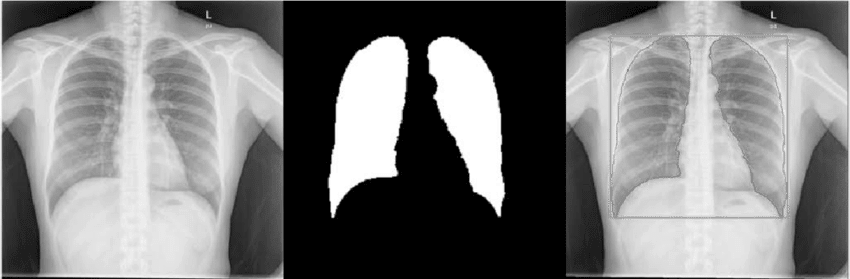

In [16]:
from google.colab.patches import cv2_imshow

cv2_imshow(img_gray)

이미지를 3분할 하려고했는데 이미지의 shape가 279, 850이여서 850은 3으로 나누기가 어려워서 849까지하여 3분할을 했습니다. 혹시나 문제가 생길까봐 그림판으로 확인했는데 분할이 제대로 잘 된것 같아 그대로 진행했습니다.

In [17]:
img_hsplit= np.hsplit(img_gray[:,:849],3)
print(np.shape(img_hsplit))

(3, 279, 283)


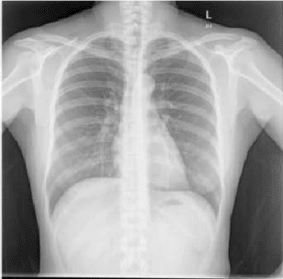

In [18]:
cv2_imshow(img_hsplit[0])

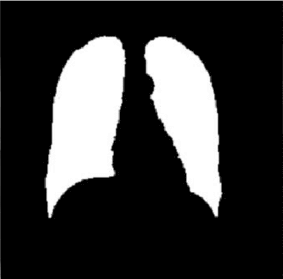

In [19]:
cv2_imshow(img_hsplit[1])

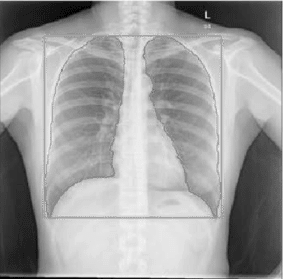

In [20]:
cv2_imshow(img_hsplit[2])

3개로 나눈 이미지를 bitwise_and연산자를 이용하여 구하기

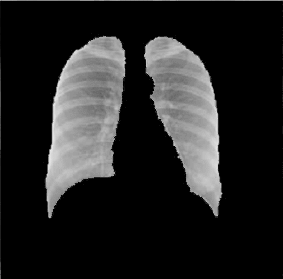

In [21]:
Lung_domain = cv2.bitwise_and(img_hsplit[0],img_hsplit[1])
cv2_imshow(Lung_domain)

실행은 시키지 않았지만 혹시라도 파일을 저장할 경우 사용할 imwrite코드 작성


In [39]:
cv2.imwrite("/content/masked_lung.png",Lung_domain)

True